Creating histograms and general averages of raw data

In [1]:
# import statements
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines # for legend creation
import numpy as np
import cartopy.crs as ccrs
%matplotlib inline
plt.rcParams["font.family"] = "Avenir"

In [2]:
# read in data (loads all sheets and creates a dictionary of dataframes)
# using raw data and not interpolated
comps = pd.read_excel("data/comp_raw.xlsx", sheet_name=None)
inter = pd.read_excel("data/comp_inter.xlsx", sheet_name=None)

530


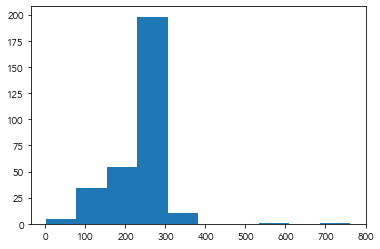

In [17]:
test = comps['HLY05-01 JPC-TC5']["Magnetite [ppm]"]
plt.hist(test)
print(comps['HLY05-01 JPC-TC5']["Magnetite [ppm]"].size)

[1600.1568326967415, 155.0576273081788, 2781.8474576271187, 88.98350429132749, 443.0766489865692, 439.63029353372065, 134.9372471883846, 91.26273922437106, 288.8175695353408, 7342.068769505955, 148.7172669944252, 148.90424600074488, 82.66011008316262, 1171.3266420167365, 12.200000000000001, 120.89118567349152, 396.04229915008295, 198.19185015932578]
869.1540161097599
176.62473873375228


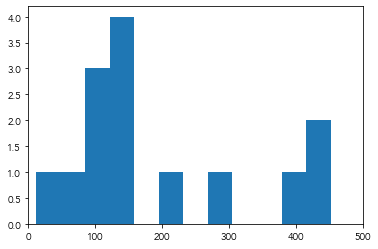

In [17]:
sed_avgs = []
for key in comps:
    if "Sedimentation Rate [m/Ma]" in comps[key].columns:
        sed_avgs.append(comps[key]["Sedimentation Rate [m/Ma]"].mean())
plt.hist(sed_avgs, 200)
plt.xlim(0, 500)
print(sed_avgs)
print(pd.Series(sed_avgs).mean())
print(pd.Series(sed_avgs).median())

In [8]:
toc_avgs = []
toc_values = []
for key in comps:
    if "TOC [wt. %]" in comps[key].columns:
        toc_avgs.append(comps[key]["TOC [wt. %]"].mean())
        toc_values.extend(comps[key]["TOC [wt. %]"])
print(toc_avgs)
print(pd.Series(toc_avgs).mean())
print(pd.Series(toc_avgs).median())

# find amount of TOC data between 0-1 wt. %
boundary = 1
toc_series = pd.Series(toc_values)
print(toc_series.count())
low_toc = toc_series[toc_series < boundary]
print(low_toc.count())
print("% of data below " + str(boundary) + " wt. %: " + str(100*(low_toc.count()/toc_series.count())))


[1.3821428571428573, 0.2687311827956989, 3.6608633709677436, 0.5374285714285716, 1.2520000000000002, 1.0809009009009012, 0.9901515151515151, 0.3410588235294117, 0.2788181818181819, 0.8987859125385524, 0.49476923076923085, 0.42780000000000007, 0.3273684210526316, 0.6268951377568737, 0.14888842586383652, 1.0020224719101123, 2.6000000000000005, 1.3804878048780491, 1.6314560421408035]
1.0173983605602617
0.8987859125385524
2109
1511
% of data below 1 wt. %: 71.64532954006638


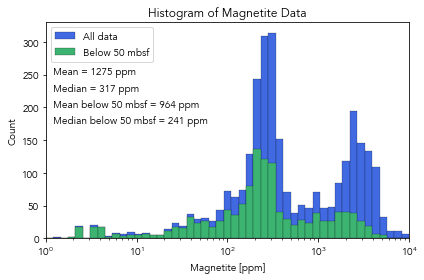

In [46]:
# combine all magnetite data points from different dataframes
mag_values = []
site_avgs = []
mag_and_depth = pd.DataFrame()
log_bins = np.logspace(0, 4)
# make a DF of all magnetite and depth values
for key in comps:
    mag_values.extend(comps[key]["Magnetite [ppm]"])
    site_avgs.append(comps[key]["Magnetite [ppm]"].mean())
    mag_and_depth = mag_and_depth.append(comps[key].iloc[:,0:2], True)

# take just data below 50 mbsf
below = mag_and_depth[(mag_and_depth["Depth [mbsf]"] > 50)|(mag_and_depth["Depth [mcd]"] > 50)|(mag_and_depth["Depth [ambsf]"] > 50)].dropna(subset=["Magnetite [ppm]"])
below_mag = below["Magnetite [ppm]"]


# do stats
avg = round(pd.Series(mag_values).mean())
avg_string = "Mean = " + str(avg) + " ppm"
median = round(pd.Series(mag_values).median())
median_string = "Median = " + str(median) + " ppm"

# stats below 50m
deep_avg = round(pd.Series(below_mag).mean())
deep_avg_string = "Mean below 50 mbsf = " + str(deep_avg) + " ppm"
deep_median = round(pd.Series(below_mag).median())
deep_median_string = "Median below 50 mbsf = " + str(deep_median) + " ppm"

plt.hist(mag_values, log_bins, color="royalblue", linewidth=0.2, edgecolor="k", label="All data")
plt.hist(below_mag,log_bins, color="mediumseagreen", linewidth=0.2, edgecolor="k", label="Below 50 mbsf")
#plt.text(5000,500,avg_string)
#plt.text(5000,350,median_string)
plt.xlim(1,10000)
plt.text(1.2, 250, avg_string)
plt.text(1.2, 225, median_string)
plt.text(1.2, 200, deep_avg_string)
plt.text(1.2, 175, deep_median_string)
plt.xlabel("Magnetite [ppm]")
plt.xscale("log")
plt.ylabel("Count")
plt.legend(loc="upper left")
plt.title("Histogram of Magnetite Data")
plt.tight_layout()
plt.savefig("outputs/compilation/hist/overlapping.pdf")

In [ ]:
# more stats
mag_series = pd.Series(mag_values)
print("total:",mag_series.count())
selected = mag_series[mag_series.between(100,500)]
below_selected = below_mag[below_mag.between(100,500)]
print("within bounds:",selected.count())
print("% within bounds:",(selected.count()/mag_series.count())*100)
print("% within bounds below:",(below_selected.count()/below_mag.count())*100)

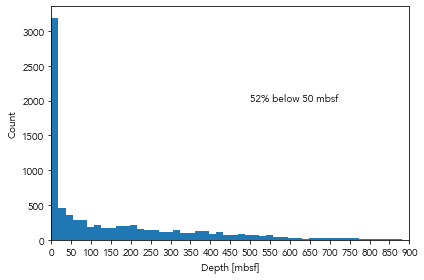

In [25]:
# histogram depths to see depth distribution of data
depths = []
depths.extend(mag_and_depth["Depth [mbsf]"].dropna())
depths.extend(mag_and_depth["Depth [mcd]"].dropna())
depths.extend(mag_and_depth["Depth [ambsf]"].dropna())

plt.hist(depths, 50)

plt.xticks(np.arange(0,1000,50))
plt.xlabel("Depth [mbsf]")
plt.ylabel("Count")
plt.xlim(0,900)

# percent of data below certain depth
dseries = pd.Series(depths)
boundary = 50
below = dseries[dseries > boundary]
percent_below = (below.count()/dseries.count())*100
percent_string = str(round(percent_below)) + "% below " + str(boundary) + " mbsf"
plt.text(500, 2000, percent_string)

plt.tight_layout()
plt.savefig("outputs/compilation/hist/depth-hist.pdf")


/var/folders/_h/rf1x6kzd5h95m4sbv_q28lyc0000gn/T/ipykernel_65030/1171442163.py:4: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(0,1050)


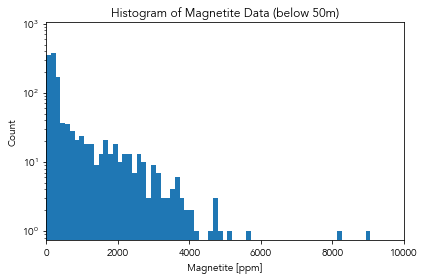

In [109]:
plt.hist(below_mag, 75, (0,10000))
plt.xlim(0,10000)
plt.yscale("log")
plt.ylim(0,1050)
plt.xlabel("Magnetite [ppm]")
plt.ylabel("Count")
plt.title("Histogram of Magnetite Data (below 50m)")
plt.tight_layout()
#plt.savefig("outputs/compilation/hist/mag_hist_deep_log.pdf")

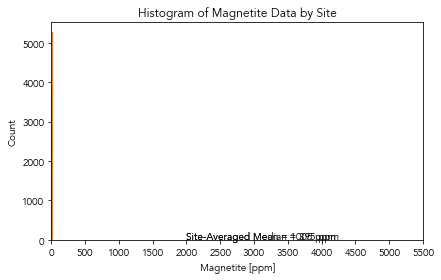

In [36]:
ax1 = plt.hist(site_avgs,30)
plt.xticks(np.arange(0,6000,step=500))
plt.xlim(0,5500)
site_avg_string = "Site-Averaged Mean = " + str(round(pd.Series(site_avgs).mean())) + " ppm"
site_median_string = "Site-Averaged Median = " + str(round(pd.Series(site_avgs).median())) + " ppm"
plt.text(2000,4,site_avg_string)
plt.text(2000,3.5,site_median_string)
plt.xlabel("Magnetite [ppm]")
plt.ylabel("Count")
plt.title("Histogram of Magnetite Data by Site")
plt.tight_layout()
#plt.savefig("outputs/compilation/mag_hist_bysite.pdf")

(0.0, 6000.0)

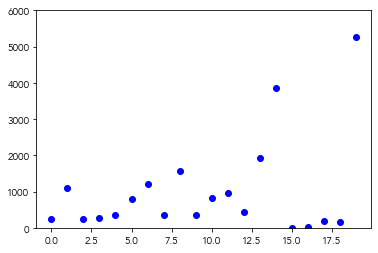

In [39]:
plt.plot(site_avgs, "bo")
plt.ylim(0,6000)

In [8]:
print(inter["IODP 178-1096"][["Magnetite [ppm]","Sulfate [mM]"]])

      Magnetite [ppm]  Sulfate [mM]
0                 NaN     28.600000
1                 NaN     28.600000
2                 NaN     28.600000
3          153.260870     28.586441
4                 NaN     28.285424
...               ...           ...
1120        60.869565      2.300000
1121              NaN      2.300000
1122       234.782609      2.300000
1123       220.652174      2.300000
1124        73.913043      2.300000

[1125 rows x 2 columns]


In [22]:
# compile magnetite-sulfate compilation data
mag_sulf = pd.DataFrame()
log_bins = np.logspace(0, 4)
cutoff = 5
for key in inter:
    if "Sulfate [mM]" in inter[key].columns:
        mag_sulf = mag_sulf.append(inter[key][["Magnetite [ppm]","Sulfate [mM]"]], True)

high_sulf = mag_sulf[mag_sulf["Sulfate [mM]"] >= cutoff]["Magnetite [ppm]"].dropna()
low_sulf = mag_sulf[mag_sulf["Sulfate [mM]"] < cutoff]["Magnetite [ppm]"].dropna()

print("All magnetite: \n", high_sulf.describe())
print("Low sulfate magnetite: \n", low_sulf.describe())


All magnetite: 
 count     604.000000
mean      387.926000
std       362.554809
min         1.305989
25%       178.670457
50%       272.826087
75%       479.076087
max      2934.782609
Name: Magnetite [ppm], dtype: float64
Low sulfate magnetite: 
 count      1264.000000
mean        939.487828
std        7804.965657
min           0.850799
25%         123.853541
50%         251.086957
75%         403.455350
max      258695.652174
Name: Magnetite [ppm], dtype: float64


In [ ]:
# create a dictionary to match a unique color and unique marker to each sheet
# 20 sheets at the moment (counting up to Towuti)
colors = ["r", "b", "g", "c", "m", "y", "k", "orange", "lime", "darkviolet", "grey", "gold", "darkcyan", "coral", "maroon", "yellowgreen", "springgreen", "orangered", "moccasin", "slateblue"]
markers = [".", "v", "^", "<", ">", "8", "s", "p", "*", "h", "H", "+", "1", "2", "3", "|", "_", "D", "d", "x"]
color_dict = dict(zip(list(comps.keys()), colors))
marker_dict = dict(zip(list(comps.keys()), markers))

In [ ]:
depth_fig, depth_ax = plt.subplots()
toc_fig, toc_ax = plt.subplots()
sulf_fig, sulf_ax = plt.subplots()
iron_fig, iron_ax = plt.subplots()

# go through each sheet, plot all variables in the sheet
for c_key in comps:
    # depth can be mbsf or mcd or ambsf
    if "Depth [mbsf]" in comps[c_key].columns:
        depth_ax.plot(comps[c_key]["Magnetite [ppm]"], comps[c_key]["Depth [mbsf]"], color=color_dict[c_key], marker=marker_dict[c_key], markersize=2, label=c_key, linestyle="None", mew=0.5)

    if "Depth [mcd]" in comps[c_key].columns:
        depth_ax.plot(comps[c_key]["Magnetite [ppm]"], comps[c_key]["Depth [mcd]"], color=color_dict[c_key], marker=marker_dict[c_key], markersize=2, label=c_key, linestyle="None", mew=0.5)

    if "Depth [ambsf]" in comps[c_key].columns:
        depth_ax.plot(comps[c_key]["Magnetite [ppm]"], comps[c_key]["Depth [ambsf]"], color=color_dict[c_key], marker=marker_dict[c_key], markersize=2, label=c_key, linestyle="None", mew=0.5)

    if "TOC [wt. %]" in comps[c_key].columns:
        toc_ax.plot(comps[c_key]["Magnetite [ppm]"], comps[c_key]["TOC [wt. %]"], color=color_dict[c_key], marker=marker_dict[c_key], markersize=2, label=c_key, linestyle="None", mew=0.5)

    if "Sulfate [mM]" in comps[c_key].columns:
        # uncomment one of the lines below to plot either colorbar (lower) or normal (upper)
        sulf_ax.plot(comps[c_key]["Magnetite [ppm]"], comps[c_key]["Sulfate [mM]"], color=color_dict[c_key], marker=marker_dict[c_key], markersize=2, label=c_key, linestyle="None", mew=0.5)
        #sulf_im = sulf_ax.scatter(comps[c_key]["Magnetite [ppm]"], comps[c_key]["Sulfate [mM]"], c=comps[c_key]["TOC [wt. %]"], vmin=0, vmax=2, marker=marker_dict[c_key], s=2, label=c_key, linestyle="None", linewidths=0.5, edgecolors="none", cmap="cividis")

    if "Fe 2+ [uM]" in comps[c_key].columns:
        iron_ax.plot(comps[c_key]["Magnetite [ppm]"], comps[c_key]["Fe 2+ [uM]"], color=color_dict[c_key], marker=marker_dict[c_key], markersize=2, label=c_key, linestyle="None", mew=0.5)
